In [1]:
import speech_recognition as sr
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [2]:
%pwd

'/home/howard/ml_sudio'

In [3]:
for index, name in enumerate(sr.Microphone.list_microphone_names()):
    print(index, name)

0 HDA Intel PCH: ALC1220 Analog (hw:0,0)
1 HDA Intel PCH: ALC1220 Digital (hw:0,1)
2 HDA Intel PCH: ALC1220 Alt Analog (hw:0,2)
3 HDA NVidia: HDMI 0 (hw:1,3)
4 HDA NVidia: HDMI 1 (hw:1,7)
5 HDA NVidia: HDMI 2 (hw:1,8)
6 sysdefault
7 front
8 surround21
9 surround40
10 surround41
11 surround50
12 surround51
13 surround71
14 iec958
15 spdif
16 pulse
17 dmix
18 default


In [31]:
sr.Microphone.list_microphone_names()

['HDA Intel PCH: ALC1220 Analog (hw:0,0)',
 'HDA Intel PCH: ALC1220 Digital (hw:0,1)',
 'HDA Intel PCH: ALC1220 Alt Analog (hw:0,2)',
 'HDA NVidia: HDMI 0 (hw:1,3)',
 'HDA NVidia: HDMI 1 (hw:1,7)',
 'HDA NVidia: HDMI 2 (hw:1,8)',
 'sysdefault',
 'front',
 'surround21',
 'surround40',
 'surround41',
 'surround50',
 'surround51',
 'surround71',
 'iec958',
 'spdif',
 'pulse',
 'dmix',
 'default']

In [40]:
# obtain audio from the microphone
r = sr.Recognizer()
r.energy_threshold = 500
r.dynamic_energy_threshold = True
with sr.Microphone() as source:
    print("Say something!")
    mic = sr.Microphone()
    print(mic)
    audio = r.listen(source)

Say something!


In [41]:
print("Google Speech Recognition thinks you said:\n" , r.recognize_google(audio))

Google Speech Recognition thinks you said:
 hello shrimp is my good friend


In [162]:
# obtain audio from the microphone for 5 seconds
# fsam= 40khz
r = sr.Recognizer()
fsam=40000
with sr.Microphone(sample_rate=fsam) as source:
    audio_f = r.record(source,duration=5)

In [163]:
byte_data=audio_f.get_wav_data()

In [164]:
data_list=list(byte_data)

## len(byte_data) include the wav title...

In [165]:
len(byte_data)

399404

In [166]:
# actual audio byte number
len(byte_data)-44

399360

In [167]:
# actual audio sample
( len(byte_data)-44 )/2

199680.0

## the audio data starts from 44

In [168]:
byte_data[44:60]

b'\x00\x00\x01\x00\xff\xff\xff\xff\x08\x00\xee\xff \x00\xd4\xff'

In [169]:
byte_data[44]

0

In [171]:
print(type(byte_data))
print(type(byte_data[44]))
print(byte_data[44])

<class 'bytes'>
<class 'int'>
0


In [172]:
print(type(data_list))
print(type(data_list[44]))
print(data_list[44])

<class 'list'>
<class 'int'>
0


In [173]:
audio_ary=np.array(data_list)

In [174]:
print(type(audio_ary))
print(type(audio_ary[44]))
print(audio_ary[44])

<class 'numpy.ndarray'>
<class 'numpy.int64'>
0


In [175]:
total_data_byte_number=audio_ary[40]+audio_ary[41]*256+audio_ary[42]*65536+audio_ary[43]*1024*1024*16 
total_sample_number=total_data_byte_number//2
print(total_sample_number)

199680


In [176]:
result=np.empty( total_sample_number ,  np.int16)
idx=0
for i in range(0, 2*total_sample_number, 2):
    sample=audio_ary[44+i]+audio_ary[44+i+1]*256
    result[idx]=np.int16(sample)
    idx=idx+1

## Let's plot the recorded waveform

In [177]:
T=1/fsam
stop=(total_sample_number-1)*T
t=np.linspace(0,stop,total_sample_number)
print(len(t))
print(t[len(t)-1])

199680
4.991975


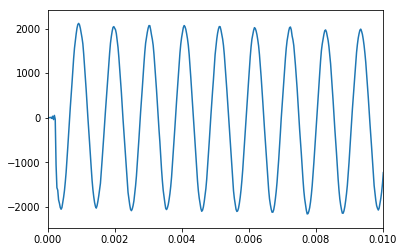

In [178]:
plt.xlim(0,0.01)
plt.plot(t,result)

## Use last NSample points ,,, it is stable

In [179]:
NSample=20000
r  =(result.shape[0])-NSample
rr =result.shape[0]

In [180]:
print(r)
print(rr)

179680
199680


In [181]:
yy=result[r:rr]

totalN=80000
yyy=np.pad(yy,(0,totalN-NSample),'constant')

In [182]:
len(yyy)

80000

In [183]:
T=1/fsam
stop=(totalN-1)*T
t=np.linspace(0,stop,totalN)

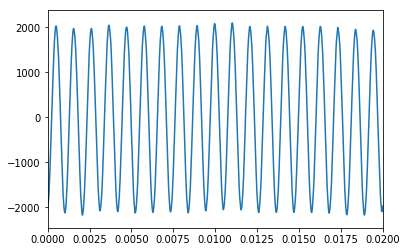

In [184]:
plt.xlim(0,0.02)
plt.plot(t,yyy)

In [185]:
from scipy import fftpack
faX=fftpack.fft(yyy)
Xc=faX*T
Xcabs=np.abs(Xc)

In [186]:
freqs=fftpack.fftfreq(totalN,T)
np.max(Xcabs)

510.76746494827677

In [187]:
peak_result=np.where(Xcabs==np.max(Xcabs))
peak_index=peak_result[0][0]
print('The frequency is :' ,freqs[peak_index])

The frequency is : 950.0


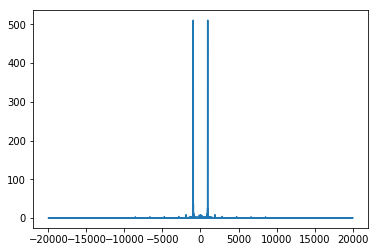

In [191]:
plt.plot(freqs,Xcabs)

In [188]:
with open("microphone-results.wav", "wb") as f:
    f.write(audio_f.get_wav_data())

## use bmp17.exe   to extract the audio data part

In [189]:
!./bmp17.exe  microphone-results.wav

This program is to extract the audio data of the WAV file of microphone-results.wav
and generate the sampled audio values into a file out.data
  0   1   2   3 --- 52  49  46  46  
  4   5   6   7 --- 24  18  06  00  RIFF chunk size=399396
  8   9  10  11 --- 57  41  56  45  
 12  13  14  15 --- 66  6d  74  20  
 16  17  18  19 --- 10  00  00  00  
 20  21  22  23 --- 01  00  01  00  PCM=1, Num of channel=1
 24  25  26  27 --- 40  9c  00  00  sampling rate fs=40000, Sampling time Ts= 0.0000250
 28  29  30  31 --- 80  38  01  00  byte rate=80000
 32  33  34  35 --- 02  00  10  00  bits per sample=16
 36  37  38  39 --- 64  61  74  61  
 40  41  42  43 --- 00  18  06  00  audio number of byte=399360
wav file current positon =44
Starting reading data now at this position...!


00  00     0     0 --->     0
01  00     1     0 --->     1
ff  ff   255   255 --->    -1
ff  ff   255   255 --->    -1
08  00     8     0 --->     8
ee  ff   238   255 --->   -18
20  00    32     0 --->    32
d4  ff

## compare with the C extraction: 

In [190]:
result[:20]

array([    0,     1,    -1,    -1,     8,   -18,    32,   -44,    50,
         -36, -1066, -1573, -1628, -1847, -1921, -2016, -2056, -2019,
       -1903, -1787], dtype=int16)